In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = np.array(image)                      # Convert to numpy array
    return image

In [3]:
def load_image(image_path):
    image = plt.imread(image_path)
    if image.shape[2] != 0:
        image = image[:,:,0] 
    return image

In [4]:
image_path = 'cameraman.jpg'

In [5]:
image = load_image(image_path)

In [6]:
image.shape

(225, 225)

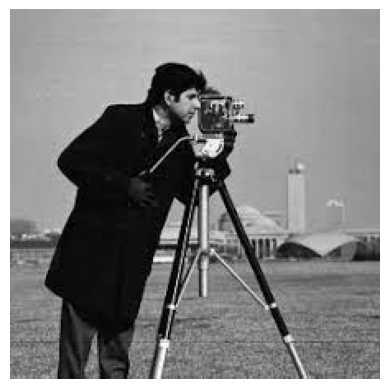

In [7]:
plt.imshow(image,'gray')
plt.axis('off')
plt.show()

In [8]:
# Fitness function: Measure segmentation quality
def fitness(chromosome, image):
    thresholds = np.sort(chromosome)  # Ensure thresholds are in ascending order
    segmented = np.digitize(image, thresholds)  # Segment image based on thresholds
    plt.imshow(segmented,'gray')
    plt.show()

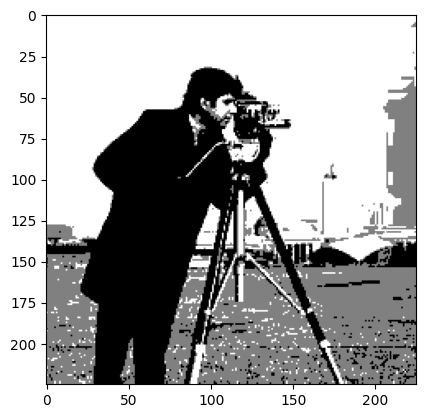

In [9]:
fitness([100,150], image)

In [10]:
# Fitness function: Measure segmentation quality
def fitness(chromosome, image):
    thresholds = np.sort(chromosome)  # Ensure thresholds are in ascending order
    segmented = np.digitize(image, thresholds)  # Segment image based on thresholds
    # Calculate intra-region uniformity (lower variance is better)
    variance = 0
    for region in range(len(thresholds) + 1):
        mask = (segmented == region)
        if np.any(mask):
            region_pixels = image[mask]
            variance += np.var(region_pixels)
    return -variance  # Minimize variance (negative for maximization) Varinace of inner class

In [11]:
np.any([2,3,4])

np.True_

In [12]:
np.any([0,1,2,3])

np.True_

In [13]:
np.any([0,0,0])

np.False_

In [14]:
np.all([1,2,3])

np.True_

In [15]:
np.all([0,1,2])

np.False_

In [16]:
fitness([128], image)

np.float64(-2469.81907664555)

In [17]:
# Initialize population
def initialize_population(pop_size, threshold_count, image):
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    population = np.random.randint(min_intensity, max_intensity, (pop_size, threshold_count))
    return population

In [18]:
pop = initialize_population(5, 3, image)
pop

array([[109, 185,  68],
       [ 44, 250, 120],
       [ 51, 117,   3],
       [130, 133,   1],
       [178,   3, 251]], dtype=int32)

In [19]:
# Selection: Tournament selection
def selection(population, fitness_scores, tournament_size=3):
    selected_indices = []
    for _ in range(len(population)):
        tournament = np.random.choice(len(population), tournament_size, replace=False)
        winner = tournament[np.argmax(fitness_scores[tournament])]
        selected_indices.append(winner)
    return population[selected_indices]

In [20]:
# Crossover: Single-point crossover
def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

In [21]:
crossover(pop[0], pop[1])

(array([109, 185, 120], dtype=int32), array([ 44, 250,  68], dtype=int32))

In [22]:
pop[0], pop[1]

(array([109, 185,  68], dtype=int32), array([ 44, 250, 120], dtype=int32))

In [23]:
# Mutation: Randomly adjust a threshold
def mutate(chromosome, mutation_rate, image):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.randint(np.min(image), np.max(image))
    return chromosome

In [24]:
mutate(pop[0], 0.1, image)

array([109, 185,  68], dtype=int32)

In [25]:
# Genetic Algorithm for Image Segmentation
def genetic_algorithm(image, pop_size=20, threshold_count=2, generations=50, mutation_rate=0.1):
    population = initialize_population(pop_size, threshold_count, image)
    best_fitness = -np.inf
    best_chromosome = None

    for generation in range(generations):
        fitness_scores = np.array([fitness(chromosome, image) for chromosome in population])
        best_index = np.argmax(fitness_scores)
        if fitness_scores[best_index] > best_fitness:
            best_fitness = fitness_scores[best_index]
            best_chromosome = population[best_index]

        # Selection
        selected_population = selection(population, fitness_scores)

        # Crossover
        new_population = []
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([child1, child2])

        # Mutation
        new_population = [mutate(chromosome, mutation_rate, image) for chromosome in new_population]

        population = np.array(new_population)

        print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")

    return best_chromosome

In [26]:
# Segment the image using the best chromosome
def segment_image(image, thresholds):
    thresholds = np.sort(thresholds)
    segmented = np.digitize(image, thresholds)
    return segmented

Generation 1, Best Fitness: -919.2486203017558
Generation 2, Best Fitness: -790.7061510362917
Generation 3, Best Fitness: -762.0726516949454
Generation 4, Best Fitness: -762.0726516949454
Generation 5, Best Fitness: -762.0726516949454
Generation 6, Best Fitness: -762.0726516949454
Generation 7, Best Fitness: -762.0726516949454
Generation 8, Best Fitness: -762.0726516949454
Generation 9, Best Fitness: -762.0726516949454
Generation 10, Best Fitness: -762.0726516949454
Generation 11, Best Fitness: -762.0726516949454
Generation 12, Best Fitness: -762.0726516949454
Generation 13, Best Fitness: -762.0726516949454
Generation 14, Best Fitness: -762.0726516949454
Generation 15, Best Fitness: -762.0726516949454
Generation 16, Best Fitness: -762.0726516949454
Generation 17, Best Fitness: -762.0726516949454
Generation 18, Best Fitness: -762.0726516949454
Generation 19, Best Fitness: -762.0726516949454
Generation 20, Best Fitness: -762.0726516949454
Generation 21, Best Fitness: -762.0726516949454
G

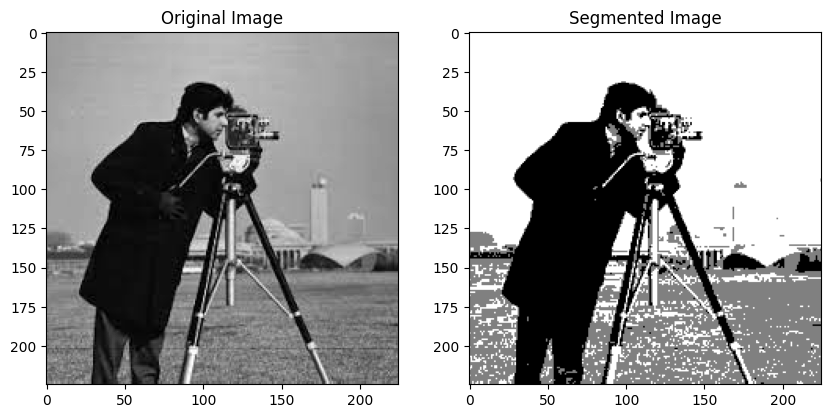

In [27]:
# Load image
image_path = "cameraman.jpg"  # Replace with your image path
image = load_image(image_path)

# Run Genetic Algorithm
best_thresholds = genetic_algorithm(image, pop_size=20, threshold_count=2, generations=50, mutation_rate=0.1)
print("Best Thresholds:", best_thresholds)

# Segment the image
segmented_image = segment_image(image, best_thresholds)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap='gray')
plt.show()